In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv")

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


## In order to find the proportion of null values in each column

In [8]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
df.shape

(19158, 13)

## We willapply cca only on those columns in which total proportion of missing data is less than 5 %

In [10]:
columns = [ele for ele in df.columns if df[ele].isnull().mean() < 0.05 and df[ele].isnull().mean() > 0]

columns

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [11]:
df_null = df[columns]
df_null

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [12]:
len(df_null)

19158

In [13]:
## After dropping length
len(df_null.dropna())

17182

### We want to understand what proportion of data remains after dropping the null values

In [14]:
(len(df_null.dropna()) / len(df_null))*100

89.68577095730244

So almost 90 percent of the data is intact after dropping all the rows in which atleast one data point was null

## Plot histogram after dropping null values

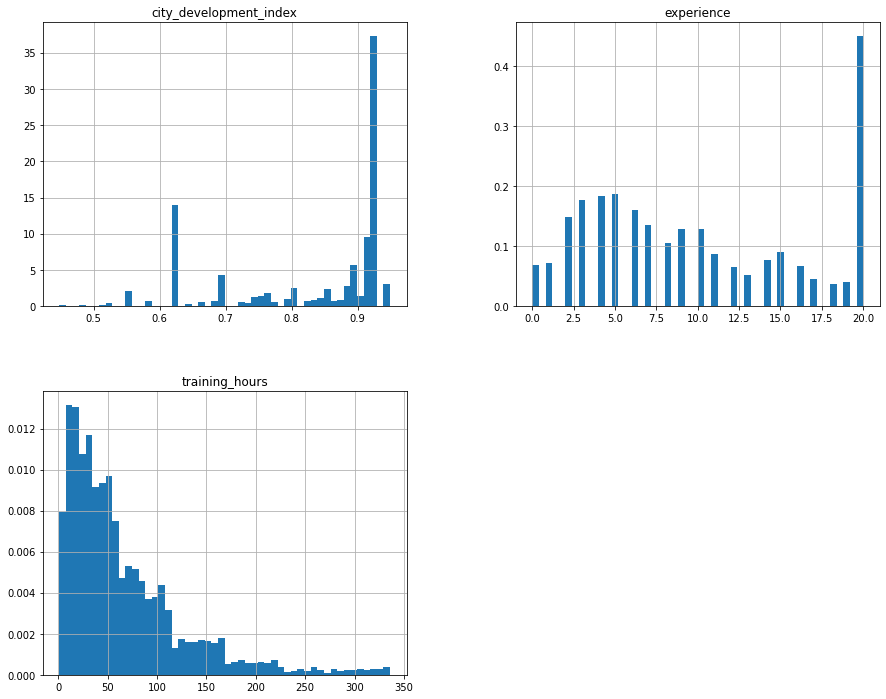

In [19]:
df_null.hist(bins = 50, density = True, figsize = (15,12))
plt.show()

## Now campare the distributions of each column before performing cca and after performing cca

<AxesSubplot:>

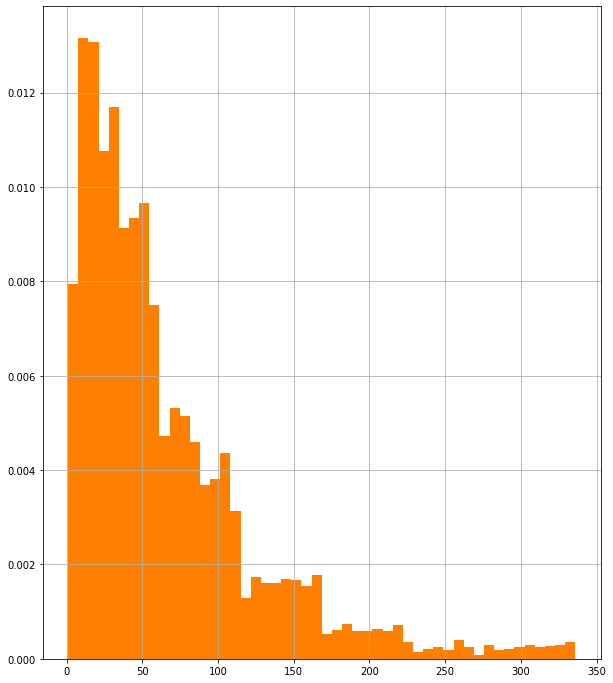

In [52]:
fig = plt.figure()

ax = fig.add_subplot(111)

# Original data
df["training_hours"].hist(bins = 50, ax = ax, density = True, color = 'red', figsize = (15,12))

# data after cca, the argument alpha makes the colour transparent so that we can see the overlay of the 2 distributions

df_null['training_hours'].hist(bins = 50, ax = ax, color = 'yellow', density = True, alpha = 0.5, figsize = (10,12))

#### So we can conclude that the distributions superimpose on each other so the distribution even after removing the null values remain intact

In [53]:
import seaborn as sns

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

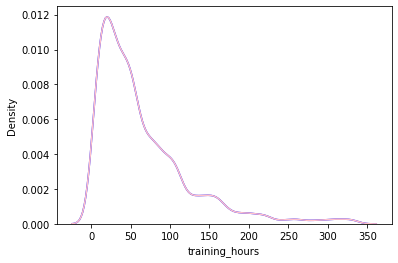

In [56]:
sns.kdeplot(df['training_hours'], color = 'blue')
sns.kdeplot(df_null['training_hours'], color = 'pink')